### importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

print(df_train.shape,df_test.shape)

(29992, 2) (7499, 2)


In [3]:
29992 + 7499

37491

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29992 entries, 0 to 29991
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  29992 non-null  object
 1   labels  29992 non-null  object
dtypes: object(2)
memory usage: 468.8+ KB


In [5]:
df_train["labels"].value_counts()

Anxious     8388
Normal      7976
Stressed    6840
Lonely      6788
Name: labels, dtype: int64

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7499 entries, 0 to 7498
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7499 non-null   int64 
 1   tweets  7499 non-null   object
dtypes: int64(1), object(1)
memory usage: 117.3+ KB


## class distribution plot od dataset

<AxesSubplot:xlabel='labels', ylabel='count'>

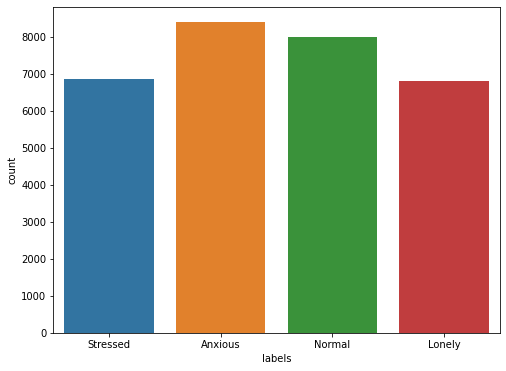

In [7]:
plt.figure(figsize=(8,6))
sns.countplot(data=df_train,x='labels')

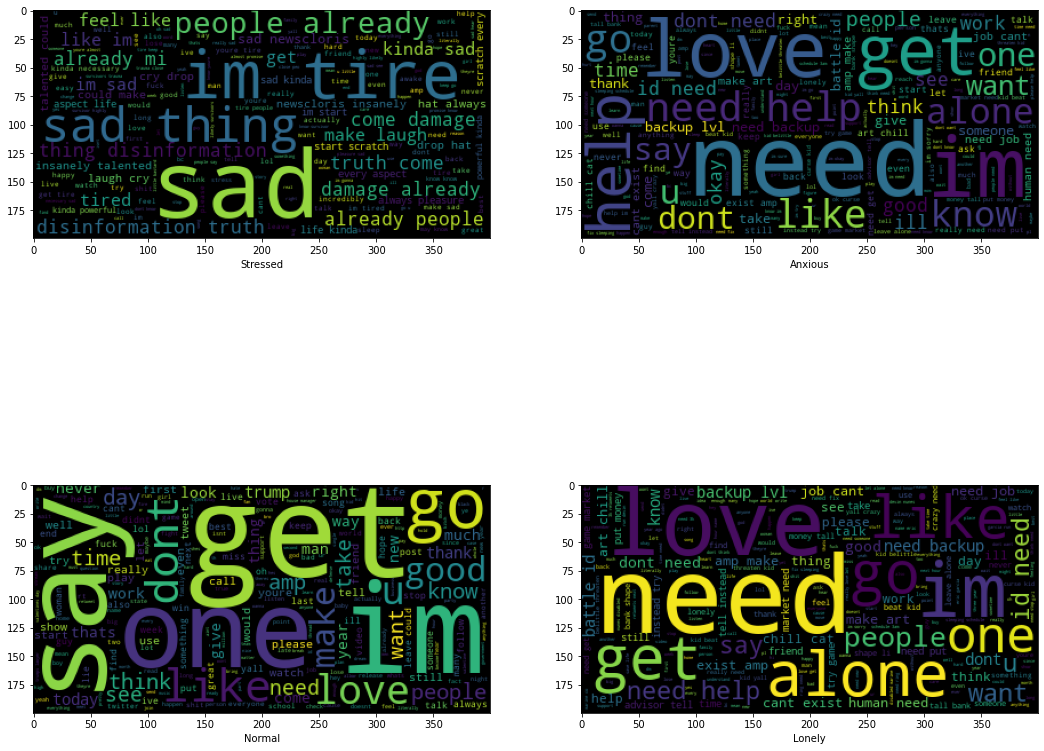

In [8]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
sw = stopwords.words("english")

wc = WordCloud(stopwords=sw,background_color="black",max_words=300)

classes = df_train['labels'].unique()
i=1
plt.figure(figsize=(18,16))
for l in classes:
    data = df_train.loc[df_train['labels'] == l,"tweets"].tolist()
    data = ". ".join(data)
    cloud = wc.generate(data)
    plt.subplot(2,2,i)
    plt.imshow(cloud)
    plt.xlabel(l)
    #print(l)
    
    i += 1

In [9]:
df_train.columns

Index(['tweets', 'labels'], dtype='object')

In [10]:
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
sents = ["I need a car to drive on the road", "The man slept on the road", "This road story makes you sleepy", "The roads are really busy"]
pd.DataFrame(sents)

,0
0,I need a car to drive on the road
1,The man slept on the road
2,This road story makes you sleepy
3,The roads are really busy
